In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import preprocessing
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('states_all.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


Eksik değerlerimizi tamamlayalım.

In [3]:
kansas_df = df[df['STATE'] == 'KANSAS']
kansas_df
kansas_filled = kansas_df.interpolate()
kansas_filled.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
16,1992_KANSAS,KANSAS,1992,NaN,2245348.0,121625.0,903199.0,1220524.0,2234915.0,1165749.0,...,36013.0,33288.0,26706.0,284143.0,120960.0,407494.0,NaN,NaN,NaN,NaN
67,1993_KANSAS,KANSAS,1993,451469.0,2386945.0,123082.0,1165178.0,1098685.0,2522542.0,1309958.0,...,35975.0,35902.0,27644.0,290339.0,127081.0,419852.0,NaN,NaN,NaN,NaN
118,1994_KANSAS,KANSAS,1994,457744.0,2700587.0,134686.0,1540727.0,1025174.0,2643192.0,1371720.0,...,36488.0,36757.0,28811.0,290633.0,130730.0,424003.0,NaN,NaN,NaN,NaN
169,1995_KANSAS,KANSAS,1995,460905.0,2826943.0,137424.0,1613143.0,1076376.0,2756682.0,1407359.0,...,36004.0,36782.0,28491.0,288908.0,133329.0,425446.0,NaN,NaN,NaN,NaN
220,1996_KANSAS,KANSAS,1996,463008.0,2914544.0,140242.0,1658774.0,1115528.0,3007653.0,1468081.0,...,35077.0,37164.0,29244.0,288376.0,137118.0,429217.0,NaN,NaN,222.18488,255.882327


In [4]:
kansas_df['AVG_MATH_4_SCORE'] = kansas_filled['AVG_MATH_4_SCORE'].fillna(231)
kansas_df['AVG_MATH_8_SCORE'] = kansas_filled['AVG_MATH_8_SCORE'].fillna(283)
kansas_df['AVG_READING_4_SCORE'] =  kansas_filled['AVG_READING_4_SCORE'].fillna(222)
kansas_df['AVG_READING_8_SCORE'] =  kansas_filled['AVG_READING_8_SCORE'].fillna(255)
kansas_df['GRADES_8_G'] = kansas_filled['GRADES_8_G']
kansas_df['GRADES_4_G'] = kansas_filled['GRADES_4_G']

### 1. Matematik notlarının ağırlıklı ortalaması için yeni bir değişken tanımlayalım.

In [5]:
weighted_average = (kansas_df['AVG_MATH_4_SCORE'].mean()*kansas_df['GRADES_4_G'] + kansas_df['AVG_MATH_8_SCORE'].mean()*
kansas_df['GRADES_8_G'])/(kansas_df['GRADES_8_G'] + kansas_df['GRADES_4_G'])

In [6]:
kansas_df['AVERAGE_MATH'] = weighted_average
kansas_df['AVERAGE_MATH']

16      261.483310
67      262.365781
118     262.473787
169     262.635425
220     263.054723
271     262.920295
322     263.023155
373     262.718783
424     262.686647
475     262.774372
526     262.989121
577     263.306418
628     263.189646
679     263.238221
730     262.968928
781     262.452323
833     262.190140
887     262.000951
939     261.808078
990     262.286174
1041    262.157560
1092    262.396132
1143    262.295536
1194    261.997721
1245    261.997721
1457    261.997721
Name: AVERAGE_MATH, dtype: float64

### 2. Bu değişkenin harcama çeşitleriyle korelasyonuna bakalım.

In [7]:
kansas_df_2 = pd.DataFrame()
kansas_df_2['AVERAGE_MATH'] = kansas_df['AVERAGE_MATH']
kansas_df_2['INSTRUCTION_EXPENDITURE'] = kansas_df['INSTRUCTION_EXPENDITURE']
kansas_df_2['SUPPORT_SERVICES_EXPENDITURE'] = kansas_df['SUPPORT_SERVICES_EXPENDITURE']
kansas_df_2['OTHER_EXPENDITURE'] = kansas_df['OTHER_EXPENDITURE']
kansas_df_2['CAPITAL_OUTLAY_EXPENDITURE'] = kansas_df['CAPITAL_OUTLAY_EXPENDITURE']

corr_mat = kansas_df_2.corr()
corr_mat

,AVERAGE_MATH,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
AVERAGE_MATH,1.000000,-0.383758,-0.332488,-0.631459,-0.601631
INSTRUCTION_EXPENDITURE,-0.383758,1.000000,0.990094,0.807894,0.857707
SUPPORT_SERVICES_EXPENDITURE,-0.332488,0.990094,1.000000,0.857021,0.838231
OTHER_EXPENDITURE,-0.631459,0.807894,0.857021,1.000000,0.753725
CAPITAL_OUTLAY_EXPENDITURE,-0.601631,0.857707,0.838231,0.753725,1.000000


In [8]:
np.fill_diagonal(corr_mat.values,0)

In [9]:
arr = kansas_df_2.corrwith(kansas_df_2['AVERAGE_MATH'], axis=0, drop=False)

x = np.where(arr == -0.6314591227016303)

print('Matematik ortalamasının en yüksek korelasyona sahip olduğu harcama çeşidi:', arr.index.values[3],'\n',
      'Korelasyon =',arr.min())

Matematik ortalamasının en yüksek korelasyona sahip olduğu harcama çeşidi: OTHER_EXPENDITURE 
 Korelasyon = -0.6314591227016303


### 3. Dört harcama kalemi için temel bileşenler analizi uygulayalım.

In [10]:
kansas_df_2 = kansas_df_2.dropna()
kansas_df_2.head()

,AVERAGE_MATH,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
67,262.365781,1309958.0,802965.0,142268.0,195674.0
118,262.473787,1371720.0,856673.0,156331.0,172340.0
169,262.635425,1407359.0,881083.0,162631.0,177250.0
220,263.054723,1468081.0,906796.0,169091.0,318829.0
271,262.920295,1476664.0,959322.0,180594.0,188156.0


In [11]:
kansas_df_2.shape

(24, 5)

In [12]:
scaled_data = StandardScaler().fit_transform(kansas_df_2.T)
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
pca_data.shape

(5, 5)

In [13]:
kansas_df_2.corr()

,AVERAGE_MATH,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
AVERAGE_MATH,1.000000,-0.622631,-0.604042,-0.631459,-0.786972
INSTRUCTION_EXPENDITURE,-0.622631,1.000000,0.990686,0.807894,0.855987
SUPPORT_SERVICES_EXPENDITURE,-0.604042,0.990686,1.000000,0.857021,0.841522
OTHER_EXPENDITURE,-0.631459,0.807894,0.857021,1.000000,0.753725
CAPITAL_OUTLAY_EXPENDITURE,-0.786972,0.855987,0.841522,0.753725,1.000000


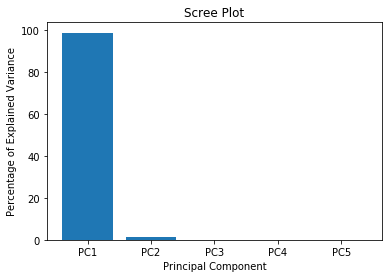

In [14]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1) 
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

PC 1 bileşeni neredeye bütün varyansı tutuyor. Burada PC1 ve PC2 değişkenlerini veri kümesinde tutmamız yeterli olacaktır.

### 4. Not ortalaması ile ilk temel bileşen arasındaki korelasyon nedir?

In [69]:
from sklearn.decomposition import PCA
kansas_df_3 = kansas_df_2[['INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE' ]]
scaled_data = preprocessing.scale(kansas_df_3)

pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
pca_data.T[0]

kansas_df_2['PCA1'] = pca_data.T[0]
kansas_df_2.corr()

,AVERAGE_MATH,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,PCA1
AVERAGE_MATH,1.000000,-0.622631,-0.604042,-0.631459,-0.786972,-0.699136
INSTRUCTION_EXPENDITURE,-0.622631,1.000000,0.990686,0.807894,0.855987,0.971264
SUPPORT_SERVICES_EXPENDITURE,-0.604042,0.990686,1.000000,0.857021,0.841522,0.980062
OTHER_EXPENDITURE,-0.631459,0.807894,0.857021,1.000000,0.753725,0.904566
CAPITAL_OUTLAY_EXPENDITURE,-0.786972,0.855987,0.841522,0.753725,1.000000,0.914086
PCA1,-0.699136,0.971264,0.980062,0.904566,0.914086,1.000000


### 5. İlk temel değişken, varyansın neredeyse tamamını tanımladığı için 4 değişken yerine bu değişkeni tercih ederdim.